# LEAD SCORING CASE STUDY

## PROBLEM STATEMENT

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<b> Lead Conversion Process</b> - Demonstrated as a funnel As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

<b> Goals of the Case Study</b> - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

### View the Sample Data

In [2]:
## Read the Data
leads = pd.read_csv("../LEADS_SCORE/Lead Scoring Assignment/Leads.csv")

## View the sample data
leads.sample(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
5766,8d39c225-2315-40d5-b3e2-b915cfccade1,605487,Landing Page Submission,Google,No,No,0,4.0,22,4.00,Email Opened,India,Human Resource Management,Multiple Sources,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Mumbai,NaN,NaN,NaN,NaN,No,No,Email Opened
7343,d138d2fc-9ea2-40aa-8ba6-2899e46cc4d3,593086,Landing Page Submission,Google,Yes,No,0,17.0,642,2.13,Page Visited on Website,India,Supply Chain Management,Student of SomeSchool,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Select,Other Cities of Maharashtra,02.Medium,01.High,13.0,17.0,No,No,Modified
3125,ba3f7215-9b03-4209-b91d-c243bc44ae2f,629925,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Already a student,Worst,No,No,Student of SomeSchool,Select,NaN,NaN,NaN,NaN,No,No,Olark Chat Conversation
1223,9e876add-e187-44c6-9bcc-d8c433a71100,646863,Landing Page Submission,Direct Traffic,No,No,1,6.0,1445,3.00,Email Opened,India,Healthcare Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Potential Lead,Thane & Outskirts,02.Medium,02.Medium,14.0,16.0,No,Yes,Email Opened
131,adc01aa8-ee1b-4fc2-9cc7-bf29117241b0,659182,API,Google,No,No,0,1.0,263,1.00,Converted to Lead,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Not Sure,No,No,Other Leads,Select,02.Medium,02.Medium,14.0,14.0,No,No,Modified


### Checking total rows and cols in dataset

In [3]:
#checking total rows and cols in dataset
leads.shape

(9240, 37)

This dataset has:

- 9240 rows
- 37 columns

In [4]:
#basic data check
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Data Cleaning & Treatment:

In [7]:
#Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

### Inference:

- As we can observe that there are select values for many column. This is because he didnt select any column,
- we will not be filling it with 'Others' because it might make wrong entry for the data which might lead to skewness. It is better to not to predict if we dont know actual business need.
- hence it shows select. So converting 'Select' values to NaN.

In [8]:
# Checking null values in each rows
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Inference - 
- From the above result, we can see no of columns having null values as per column.
- The column named 'Lead Profile' contains 74% of nulls. Similarly we can seee 'Lead Quality' been not populated for 51.5%

Below we are dropping the columns which has more than 60% of missing values and checking the missing value percentage again

In [9]:
# we will drop the columns having more than 70% NA values.
leads = leads.drop(leads.loc[:,list(round(100*(leads.isnull().sum()/len(leads.index)), 2)>60)].columns, 1)
        
#checking null values percentage
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Lead Quality

Lead Quality indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead


In [10]:
leads['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.

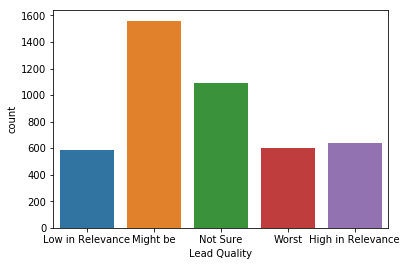

In [11]:
sns.countplot(leads['Lead Quality'])
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
leads['Lead Quality'] = leads['Lead Quality'].replace(np.nan, 'Not Sure')

After treating the missing values for the variable named 'Lead Quality'

### Asymmetrique Activity Index,Asymmetrique Activity Score,Asymmetrique Profile Index,Asymmetrique Profile Score
 An index and score assigned to each customer based on their activity and their profile

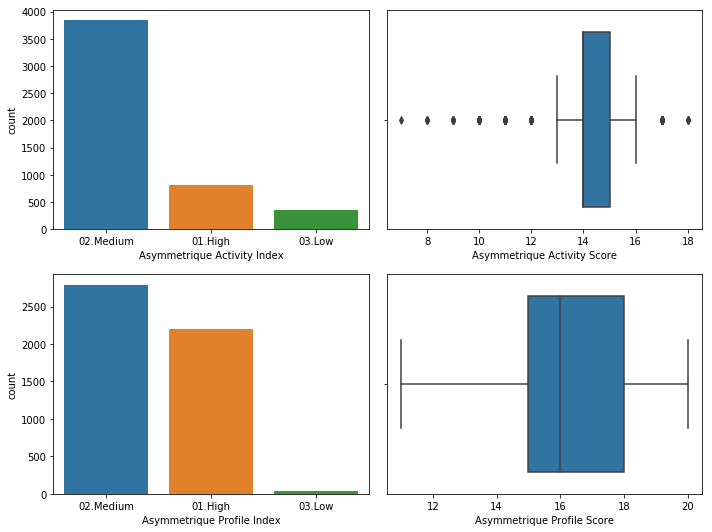

In [12]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(leads['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(leads['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(leads['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(leads['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

#### Inference
- There is too much variation in thes parameters so its not reliable to impute any value in it. 
- Defintion of the column isnt clear.
- As 45% null values means we need to drop these columns.

In [13]:
leads = leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

### View the missing value percentage

In [14]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### City

The city of the customer.

### View the description of City column

In [15]:
print(leads.City.describe())

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object


### View the distribution of City column

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

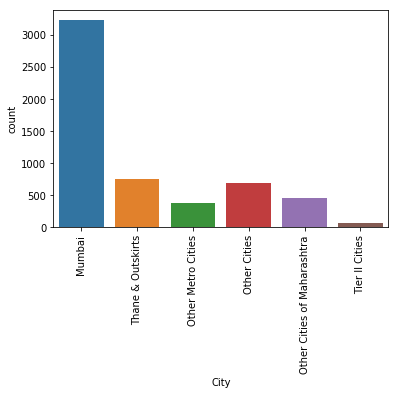

In [16]:
sns.countplot(leads.City)
plt.xticks(rotation = 90)

### Inference 
-  Around 60% of the data is Mumbai. We can see the concentration of data is more towards Mumbai

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

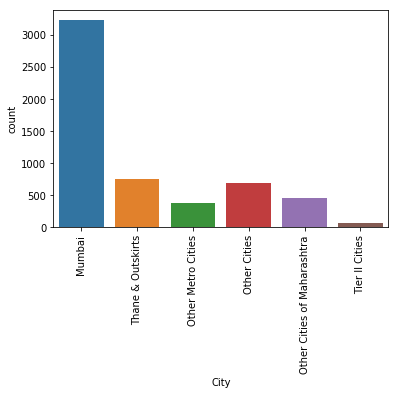

In [17]:
sns.countplot(leads.City)
plt.xticks(rotation = 90)

In [18]:
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

### Specialization

The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

### View the Column description

In [19]:
leads.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

### View the distribution of the Specialisation column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

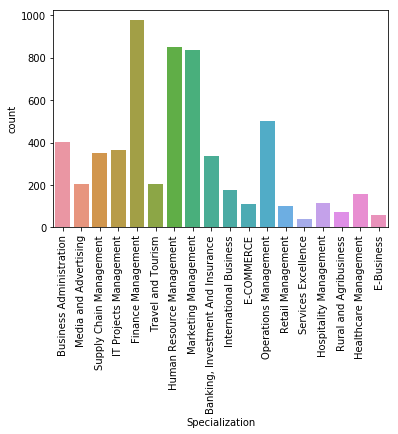

In [20]:
sns.countplot(leads.Specialization)
plt.xticks(rotation = 90)

### Inference - 
- It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list, may not have any specialization or is a student.
- Hence we can make a category "Others" for missing values. 

In [21]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

### Tags

Tags assigned to customers indicating the current status of the lead.

### View the description of Tag column

In [22]:
leads.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

### View the distribution of the Tags column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

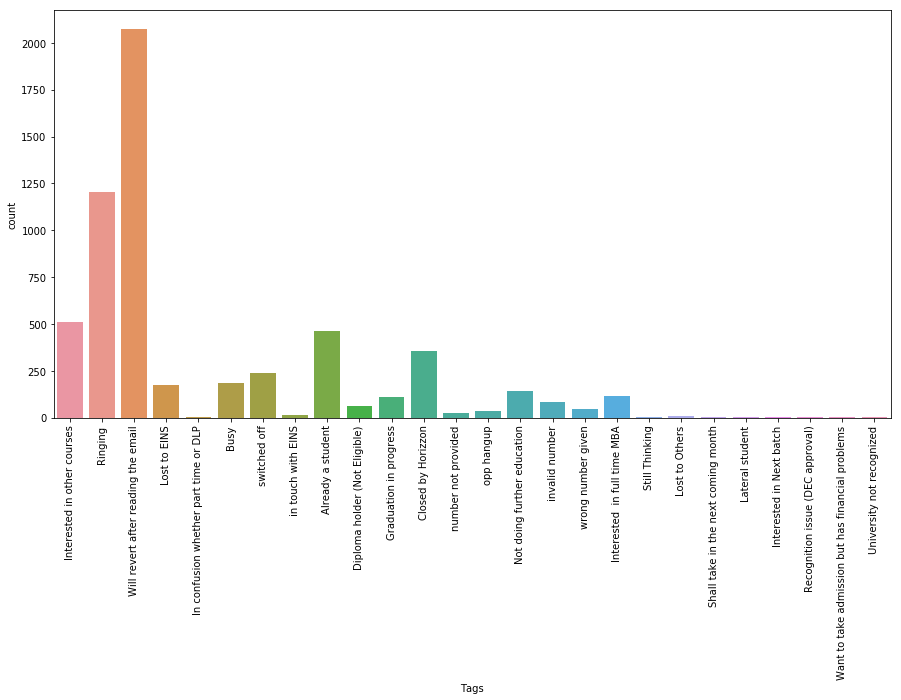

In [23]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(leads.Tags)
plt.xticks(rotation = 90)

In [24]:
leads['Tags'] = leads['Tags'].replace(np.nan, 'Will revert after reading the email')

### Inference - 
- Tags assigned to customers indicating the current status of the lead.
- Blanks in the tag column may be imputed by 'Will revert after reading the email'.

### What matters most to you in choosing a course¶

View the Description of column named What matters most to you in choosing a course

### View the description of column

In [25]:
leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

### View the distribution of column

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

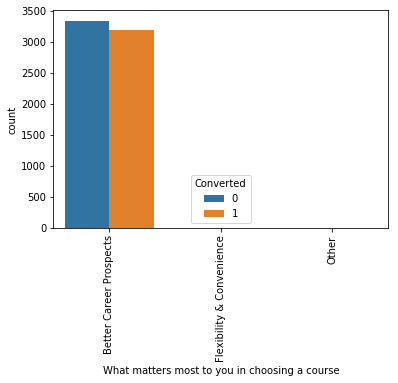

In [26]:
print(leads["What matters most to you in choosing a course"].value_counts())
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

In [27]:
# Blanks in the this column may be imputed by 'Better Career Prospects'.
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

### Inference
- The above plots shows the distribution of 'what matters most to you in choosing a course'
- Most entries are 'Better Career Prospects'. As we can say that most of them opt this course only for 'Better Career Prospects'
- No Inference can be drawn with this parameter.

### Occupation

Indicates whether the customer is a student, umemployed or employed.

### View the description of column named 'Occupation'

In [28]:
leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [29]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Other'], 'Other_Occupation')

### View the distribution of the current occupation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

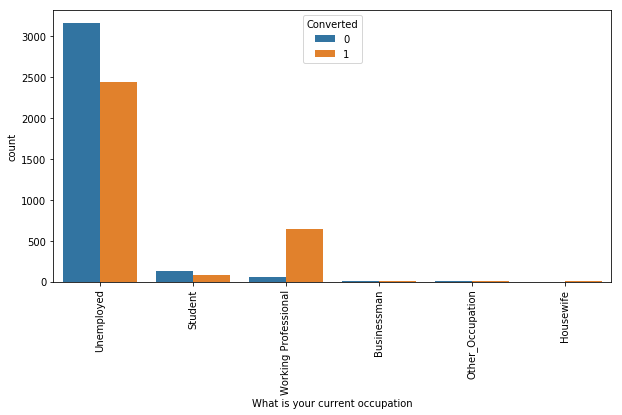

In [30]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

In [31]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

### Inference-
- The above plot defines the Conversion pattern of occupation
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.
- So we are treating missing value by replacing it with 'Unemployed'

### Country

The country of the customer.

### View the description of column named 'Occupation'

In [32]:
leads['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [33]:
leads['Country'] = leads['Country'].replace(np.nan, 'India')

### View the distribution of the Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

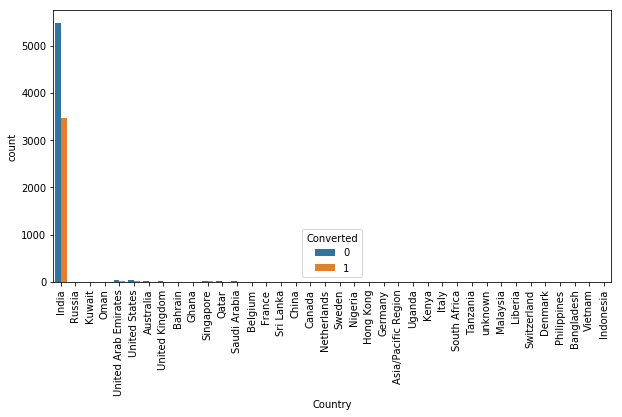

In [34]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Country", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

#### Inference-
- The above plot defines the Conversion pattern of Country column
- Country is India for most values so let's impute the same in missing values.
- From India and Russia , high chances of joining the course.

In [35]:
# Rest missing values are under 2% so we can drop these rows.
leads.dropna(inplace = True)

### View the missing value percentage

In [36]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

##### Now Data is clean and we can start with the analysis part

### Exploratory Data Analysis


#### Heat Map (Correlation)
- The below plot shows the contribuion of numeric variables on each other.
- we can also see the contribution of 'Total visit' towards the variable 'converted'.
- We can also see the correlation between the numeric variable. So it seems like no one are correlated as all columns are black in color indicating that they are not correlated

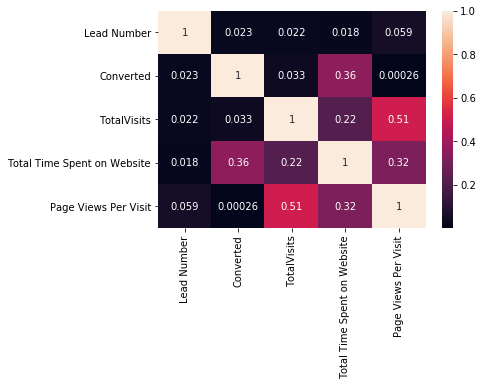

In [37]:
sns.heatmap(leads.corr(),annot=True)

### Univariate Analysis

#### Converted

In [38]:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

#### Inference -

-  Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

#### Lead Origin

The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.


In [39]:
leads['Lead Origin'].describe()

count                        9074
unique                          4
top       Landing Page Submission
freq                         4885
Name: Lead Origin, dtype: object

As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.

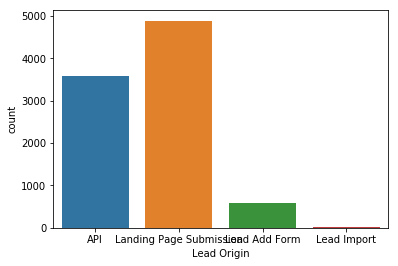

In [40]:
sns.countplot(leads['Lead Origin'])

After treating the missing values for the variable named 'Lead Quality'

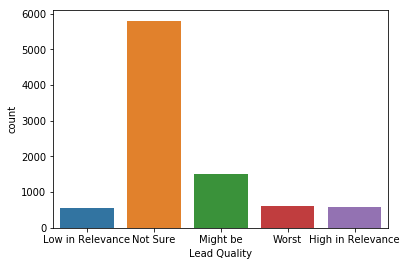

In [41]:
sns.countplot(leads['Lead Quality'])

#### Inference
- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.

<b>To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### Lead Source

The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

#### View Distribution of column named Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

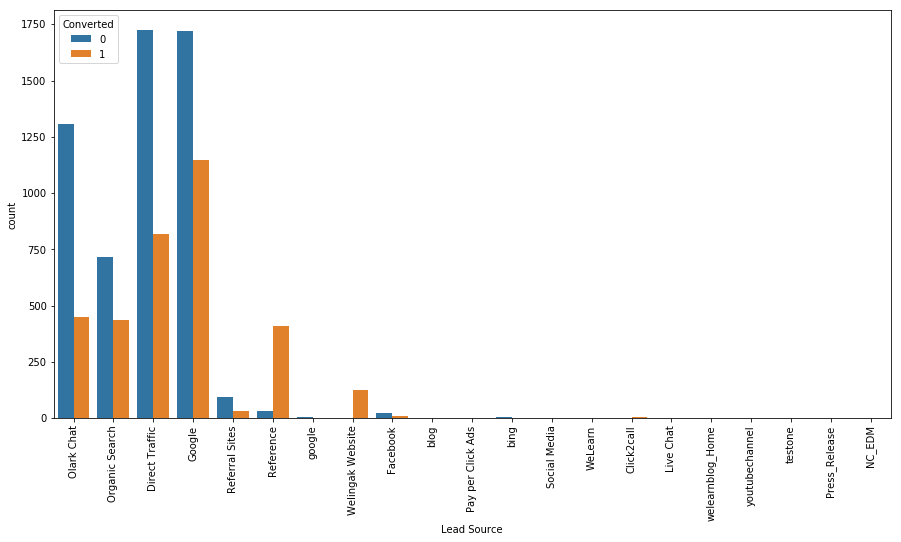

In [42]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

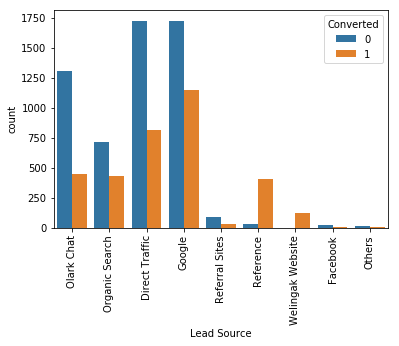

In [43]:

leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

#### Inference
- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.
 
<b>To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

#### Do Not Email & Do Not Call

Do Not Email - An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.

Do Not Call - An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.

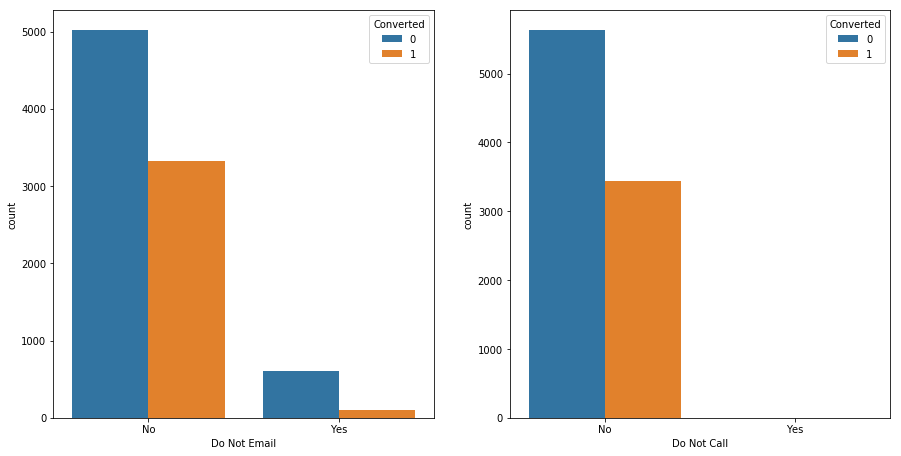

In [44]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads, ax = axs[1])

#### Total Visits

The last notable acitivity performed by the student.

#### View the Description of column named Total Visits

In [45]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

##### View the distribution within a column

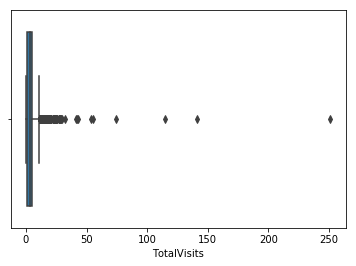

In [46]:
sns.boxplot(leads['TotalVisits'])

##### Inference
- The above plot shows the distribution of column named 'TotalVisits'
- As we can see there are a number of outliers in the data.
- We will cap the outliers to 95% value for analysis.

##### View the distribution within a column after capping

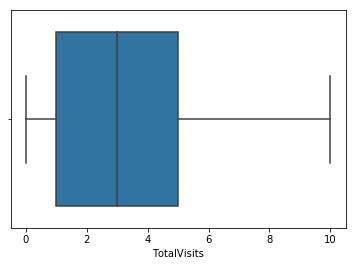

In [47]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]
sns.boxplot(leads['TotalVisits'])

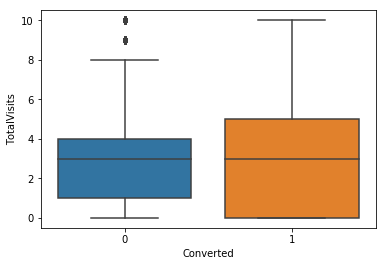

In [48]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)


##### Inference
- Median for converted and not converted leads are the same.
- Nothng conclusive can be said on the basis of Total Visits.

#### Total time spent on website

The total time spent by the customer on the website.

#### View the Description of column named Total time spent on website

In [49]:
leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

#### View the distribution within a column

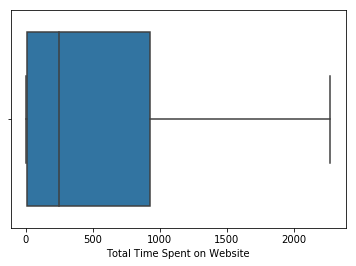

In [50]:
sns.boxplot(leads['Total Time Spent on Website'])

#### Inference
- The above plot shows the distribution of column named 'Total Time Spent on Website'
- We can see no outlier within the plot. 
- But concentration of data is skewwed towards left which mean that many peoples spent less time on website.

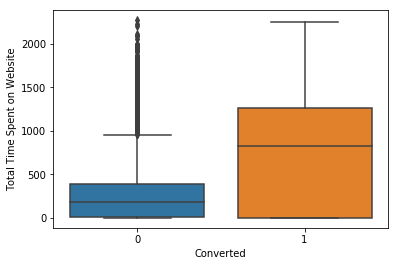

In [51]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)


#### Inference
- Leads spending more time on the weblise are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

#### Page Views Per Visit

Average number of pages on the website viewed during the visits.

#### View the Description of column named Page Views Per Visit

In [52]:
leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### View the distribution within a column

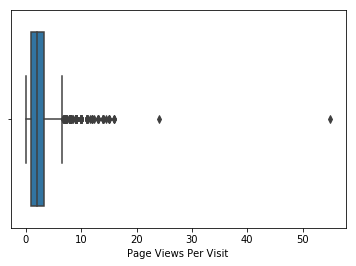

In [53]:
sns.boxplot(leads['Page Views Per Visit'])

##### Inference
- The above plot shows the distribution of column named 'Page Views Per Visit'
- As we can see there are a number of outliers in the data.
- We will cap the outliers to 95% value for analysis.

##### View the distribution within a column after capping

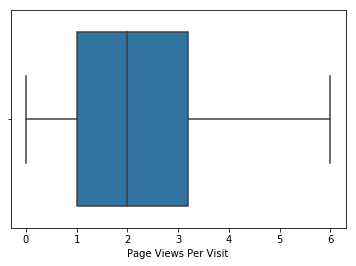

In [54]:
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]
sns.boxplot(leads['Page Views Per Visit'])

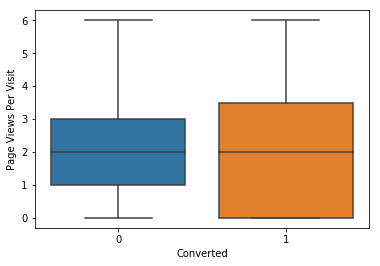

In [55]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)


#### Inference
- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

#### Last Activity

Average number of pages on the website viewed during the visits.

#### View the Description of column named Last Activity

In [56]:
leads['Last Activity'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

#### View the distribution within a column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

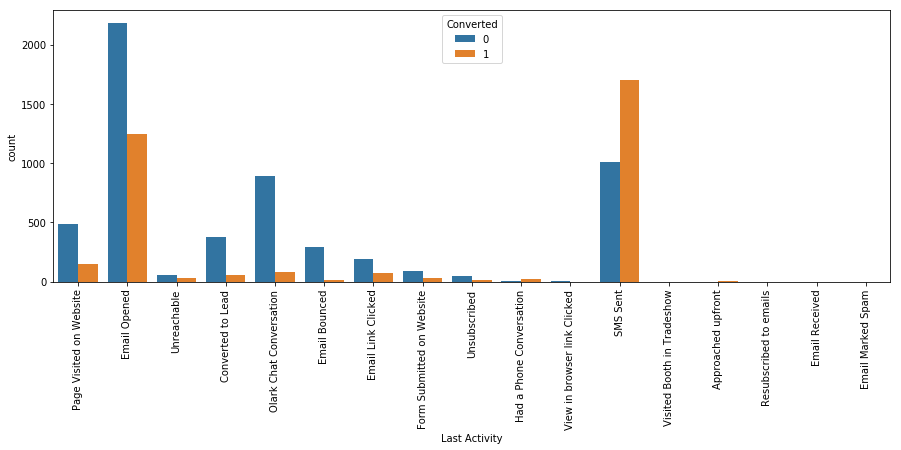

In [57]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

In [58]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

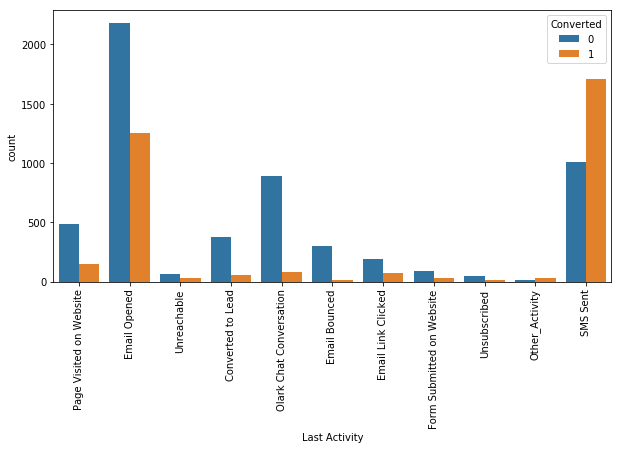

In [59]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

##### Inference
- Most of the lead have their Email opened as their last activity.
- Conversion rate for leads with last activity as SMS Sent is almost 60%.b

#### Country

The country of the customer.

##### View the description of column named 'Occupation'

In [60]:
leads.Country.describe()


count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

#### Inference
Most values are 'India' no such inference can be drawn

#### Specialization

##### View the Column description

In [61]:
leads.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [62]:
leads['Specialization'] = leads['Specialization'].replace(['Others'], 'Other_Specialization')


#### View the distribution of the Specialisation column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

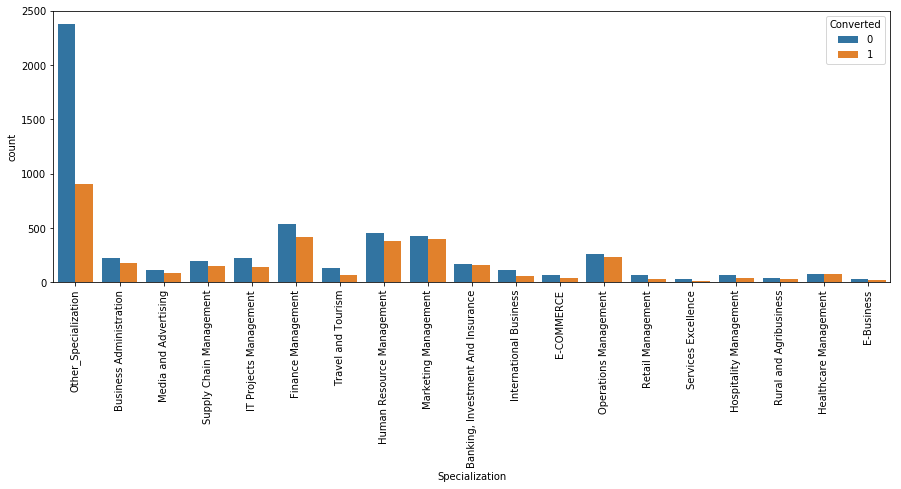

In [63]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

#### Inference - 
 Focus should be more on the Specialization with high conversion rate.. 

#### Occupation

Indicates whether the customer is a student, umemployed or employed.

#### View the description of column named 'Occupation'

In [64]:
leads['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [65]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Other'], 'Other_Occupation')

#### View the distribution of the current occupation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

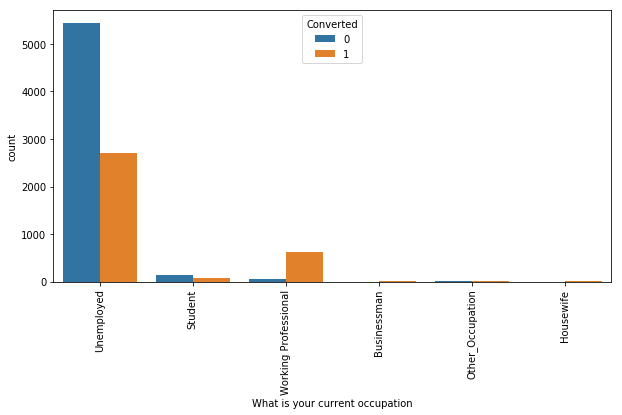

In [66]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

#### Inference-
- The above plot defines the Conversion pattern of occupation
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.


##### What matters most to you in choosing a course¶

View the Description of column named What matters most to you in choosing a course

In [67]:
leads['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

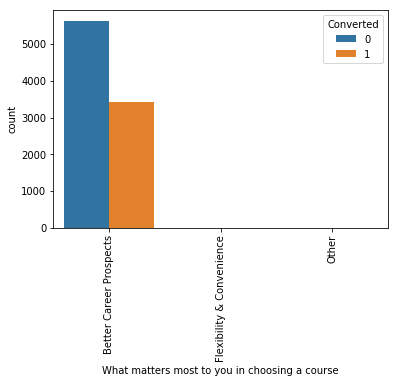

In [68]:
print(leads["What matters most to you in choosing a course"].value_counts())
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

##### Inference
- The above plots shows the distribution of 'what matters most to you in choosing a course'
- Most entries are 'Better Career Prospects'. As we can say that most of them opt this course only for 'Better Career Prospects'
- No Inference can be drawn with this parameter.

##### Search
Indicating whether the customer had seen the ad in any of the listed items.

##### View the Description of column named 'Search'

In [69]:
leads.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

##### View the value counts within a column

No     9060
Yes      14
Name: Search, dtype: int64


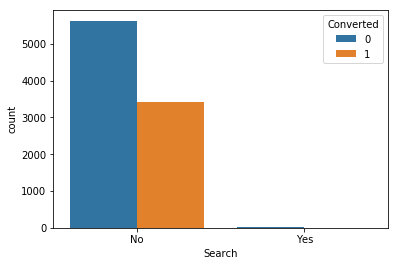

In [70]:
print(leads["Search"].value_counts())
sns.countplot(x = "Search", hue = "Converted", data = leads)

##### Inference
- The above plot shows the distribution of column named 'Search'
- Most entries are 'No', which mean that most of them who opted for course have not commed by Searching
- No Inference can be drawn with this parameter.

##### Magazine
Indicating whether the customer had seen the ad in any of the listed items.

##### View the Description of column named 'Magazine'

In [71]:
leads.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

##### View the value counts within a column

No    9074
Name: Magazine, dtype: int64


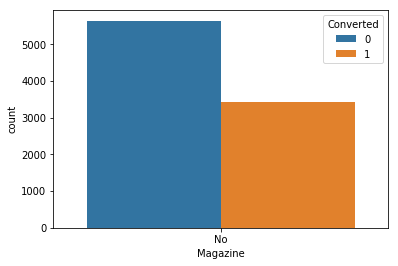

In [72]:
print(leads["Magazine"].value_counts())
sns.countplot(x = "Magazine", hue = "Converted", data = leads)

##### Inference
- The above plot shows the distribution of column named 'Magazine'
- Most entries are 'No', which mean that most of them who opted for course have not commed by using magazine
- No Inference can be drawn with this parameter.

#### Newspaper Article

Indicating whether the customer had seen the ad in any of the listed items.

#### View the Description of column named Newspaper Article

In [73]:
leads['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

#### View the value counts within a column

No     9072
Yes       2
Name: Newspaper Article, dtype: int64


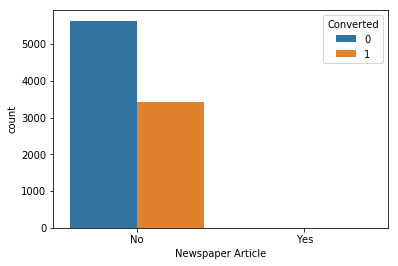

In [74]:
print(leads["Newspaper Article"].value_counts())
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads)

##### Inference
- The above plot shows the distribution of column named 'Newspaper Article'
- All entries are 'No', which mean that most of them who opted for course have not commed by using Newspaper Article
- No Inference can be drawn with this parameter.

##### X Education Forums

Indicating whether the customer had seen the ad in any of the listed items.

##### View the Description of column named X Education Forums

In [75]:
leads['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

##### Inference
- All entries are 'No', which mean that most of them who opted for course have not commed by using X Education Forums
- No Inference can be drawn with this parameter.

##### Newspaper

Indicating whether the customer had seen the ad in any of the listed items.

##### View the Description of column named Newspaper

In [76]:
leads['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

##### View the value counts within a column

No     9073
Yes       1
Name: Newspaper, dtype: int64


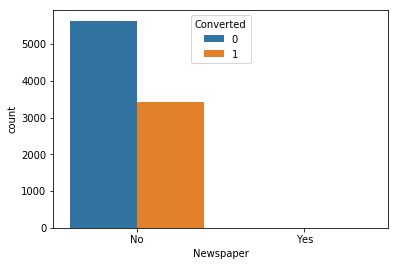

In [77]:
print(leads["Newspaper"].value_counts())
sns.countplot(x = "Newspaper", hue = "Converted", data = leads)

##### Inference
- The above plot shows the distribution of column named 'Newspaper'
- All entries are 'No', which mean that most of them who opted for course have not commed by using Newspaper
- No Inference can be drawn with this parameter.

##### Digital Advertisement

Indicating whether the customer had seen the ad in any of the listed items.

##### View the Description of column named Digital Advertisement

In [78]:
leads['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

##### View the value counts within a column

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64


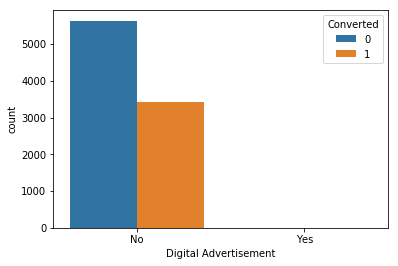

In [79]:
print(leads["Digital Advertisement"].value_counts())
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads)

##### Inference
- The above plot shows the distribution of column named 'Digital Advertisement'
- All entries are 'No', which mean that most of them who opted for course have not commed by using Digital Advertisement
- No Inference can be drawn with this parameter.

##### Through Recommendations

Indicates whether the customer came in through recommendations.

##### View the Description of column named Through Recommendations

In [80]:
leads['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

##### View the value counts within a column

No     9067
Yes       7
Name: Through Recommendations, dtype: int64


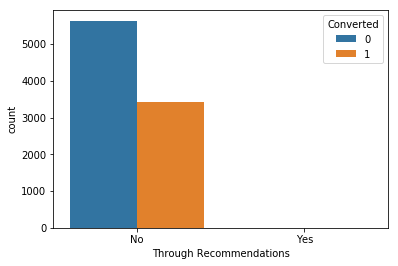

In [81]:
print(leads["Through Recommendations"].value_counts())
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads)

##### Inference
- The above plot shows the distribution of column named 'Through Recommendations'
- All entries are 'No', which mean that most of them who opted for course have not commed by using Through Recommendations
- No Inference can be drawn with this parameter.

##### Receive More Updates About Our Courses

Indicates whether the customer chose to receive more updates about the courses.

##### View the Description of column named Receive More Updates About Our Courses

In [82]:
leads['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

##### View the value counts within a column

No    9074
Name: Receive More Updates About Our Courses, dtype: int64


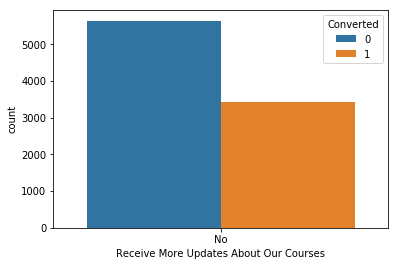

In [83]:
print(leads["Receive More Updates About Our Courses"].value_counts())
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads)

##### Inference
- The above plot shows the distribution of column named 'Receive More Updates About Our Courses'
- All entries are 'No', which mean that most of them who opted for course have not commed by using 'Receive More Updates About Our Courses'
- No Inference can be drawn with this parameter.

##### Tags

Tags assigned to customers indicating the current status of the lead.

##### View the Description of column named Tags

In [84]:
leads['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

##### View the value counts within a column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

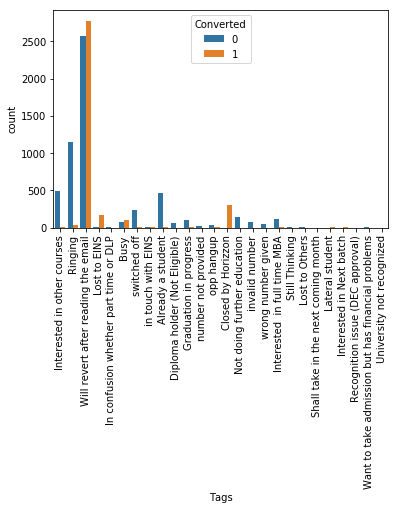

In [85]:
# print(leads["Tags"].value_counts())
sns.countplot(x = "Tags", hue = "Converted", data = leads)
plt.xticks(rotation=90)

In [86]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

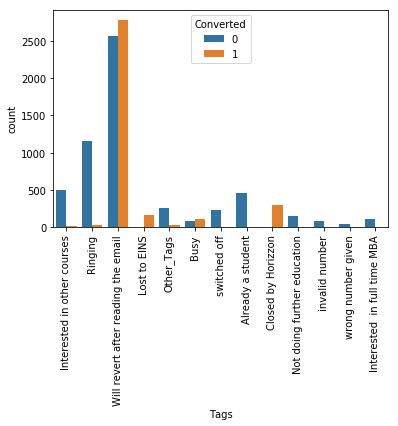

In [87]:
sns.countplot(x = "Tags", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

##### Inference
- The above plot shows the distribution of column named 'Tags'
- All entries are 'Will revert after reading the email', which mean that most of them who opted for course have not commed by using 'Tags'
- The people who have this tagging named 'Will revert after reading the email' have high conversion probability.

##### Lead Quality

Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.

##### View the value counts within a column

Not Sure             5806
Might be             1519
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

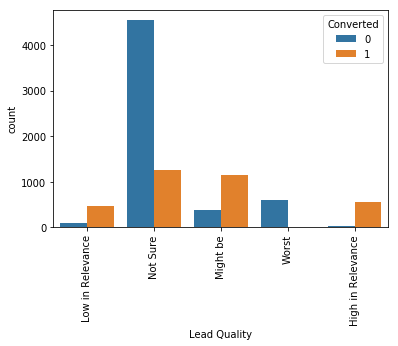

In [88]:
print(leads["Lead Quality"].value_counts(dropna=False))
sns.countplot(x = "Lead Quality", hue = "Converted", data = leads)
plt.xticks(rotation=90)

##### Inference
- The above plot shows the distribution of column named 'Lead Quality'
- All entries are 'Not Sure' and, which mean that most of them who opted for course.
- The people who have this tagging named 'Not Sure' have high conversion probability.

##### Update me on Supply Chain Content

Indicates whether the customer wants updates on the Supply Chain Content.

##### View the Description of column named Lead Quality

In [89]:
leads['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

##### View the value counts within a column

No    9074
Name: Update me on Supply Chain Content, dtype: int64


(array([0]), <a list of 1 Text xticklabel objects>)

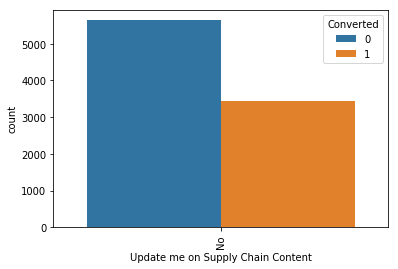

In [90]:
print(leads["Update me on Supply Chain Content"].value_counts(dropna=False))
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leads)
plt.xticks(rotation=90)

##### Inference
- The above plot shows the distribution of column named 'Update me on Supply Chain Content'
- Most entries are 'No'. 
- So we obtained no Inference can be drawn with this parameter.

##### Get updates on DM Content

Indicates whether the customer wants updates on the DM Content.

##### View the Description of column named Get updates on DM Content

In [91]:
leads['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

##### View the value counts within a column

No    9074
Name: Get updates on DM Content, dtype: int64


(array([0]), <a list of 1 Text xticklabel objects>)

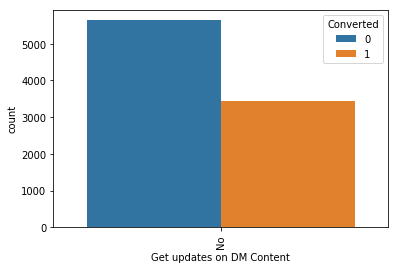

In [92]:
print(leads["Get updates on DM Content"].value_counts(dropna=False))
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads)
plt.xticks(rotation=90)

##### Inference
- The above plot shows the distribution of column named 'Get updates on DM Content'
- Most entries are 'No'. 
- So we obtained no Inference can be drawn with this parameter.

##### I agree to pay the amount through cheque

Indicates whether the mode of payment of customer ie.., amount paying through cheque

##### View the Description of column named I agree to pay the amount through cheque

In [93]:
leads['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

##### View the value counts within a column

No    9074
Name: I agree to pay the amount through cheque, dtype: int64


(array([0]), <a list of 1 Text xticklabel objects>)

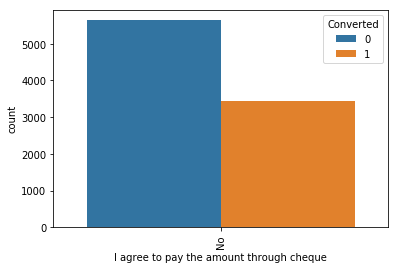

In [94]:
print(leads["I agree to pay the amount through cheque"].value_counts(dropna=False))
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads)
plt.xticks(rotation=90)

##### Inference
- The above plot shows the distribution of column named 'I agree to pay the amount through cheque'
- Most entries are 'No'. 
- So we obtained no Inference can be drawn with this parameter.

##### A free copy of Mastering The Interview

Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

##### View the Description of column named A free copy of Mastering The Interview

In [95]:
leads['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

##### View the value counts within a column

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


(array([0, 1]), <a list of 2 Text xticklabel objects>)

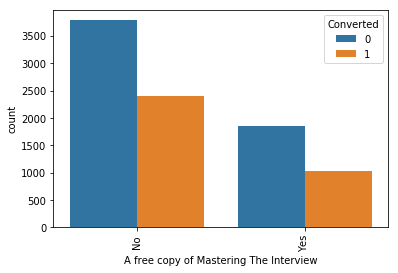

In [96]:
print(leads["A free copy of Mastering The Interview"].value_counts(dropna=False))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads)
plt.xticks(rotation=90)

##### Inference
- The above plot shows the distribution of column named 'A free copy of Mastering The Interview'
- Most entries are 'No'. 
- So we obtained no Inference can be drawn with this parameter.

#### City

The city of the customer.

##### View the description of City column

In [97]:
print(leads.City.describe())

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object


##### View the distribution of City column

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

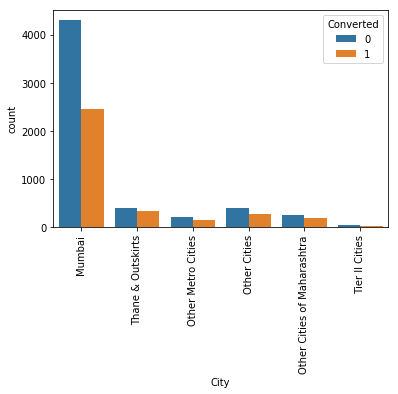

In [98]:
sns.countplot(x='City', hue = "Converted", data = leads)
plt.xticks(rotation = 90)

#### Inference
Most leads are from mumbai with around 30% conversion rate.

##### Last Notable Activity

The last notable acitivity performed by the student.

##### View the Description of column named Last Notable Activity

In [99]:
leads['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

##### View the value counts within a column

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

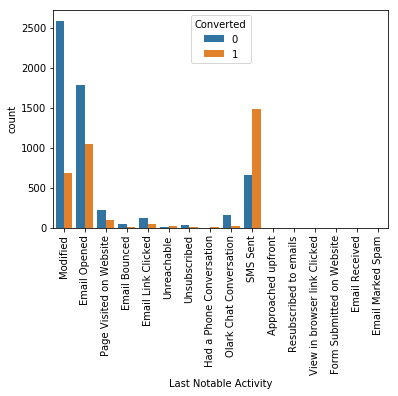

In [100]:
print(leads["Last Notable Activity"].value_counts(dropna=False))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
plt.xticks(rotation=90)

##### Inference
- The above plot shows the distribution of column named 'Last Notable Activity'
- Most entries are 'Modified' from the column named 'Last Notable Activity'

#### Results
<B>Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis

In [101]:
leads = leads.drop(['Lead Number','Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [102]:
leads.shape

(9074, 15)

In [103]:
leads.head()


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


## Data Preparation

##### Converting some binary variables (Yes/No) to (1/0)

In [104]:
# List of variables to map
varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

##### For categorical variables with multiple levels, create dummy features (one-hot encoded)¶


In [105]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','City','What is your current occupation',
                              'Tags','Lead Quality','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [106]:
# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)


In [107]:
X = leads.drop(['Prospect ID','Converted'], axis=1)

# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [108]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

- Scaling is used to make all columns lie on same scale.
- Feature scaling helps us to scale all data to one range so that it is easy to compare the columns within same scale.

In [109]:
scaler = StandardScaler()
leads.sample(3)

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7346,a1c901a4-0d05-4c76-945d-d3eed15a1699,0,1,4.0,952,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
910,465a6156-4ea4-47e4-85fe-7e8afa1c916e,0,1,3.0,117,1.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6901,6db29f04-64f9-4dcc-a433-50debf2267a2,0,0,7.0,168,3.5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [110]:
leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

##### Checking the Churn Rate

In [111]:
# Checking the Churn Rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

#### Inference -

- We can see the conversion rate to be 38%

## Model Building

### First Model

- Below is the first model defining the distribution of various variables.
- Secondly we can see the distribution of various model contribution in predicting the conversion.

In [112]:
X = leads.drop(['Prospect ID','Converted'],axis=1)
y = leads[['Converted']]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [113]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6266
Model Family:                Binomial   Df Model:                           84
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.3
Date:                Mon, 02 Mar 2020   Deviance:                       2500.7
Time:                        20:08:40   Pearson chi2:                 3.87e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.1470   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3875      0.327     -4.240      0.000      -2.029      -0.746
TotalVisits                                              0.1846      0.086      2.137      0.033       0.015       0.354
Total Time Spent on Website                              1.1473      0.064     17.935      0.000       1.022       1.273
Page Views Per Visit                                    -0.3273      0.098     -3.330      0.001      -0.520      -0.135
Lead Origin_Landing Page Submission                     -0.9865      0.220     -4.477      0.000      -1.418      -0.555
Lead Origin_Lead Add Form                               -0.4240      1.286     -0.330      0.742      -2.944       2.096
Lead Origin_Lead Import                                 29.7164   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.6174   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2021      0.155      1.304      0.192      -0.102       0.506
Lead Source_Olark Chat                                   0.8633      0.234      3.693      0.000       0.405       1.321
Lead Source_Organic Search                               0.2258      0.210      1.073      0.283      -0.187       0.638
Lead Source_Others                                       0.7598      0.816      0.931      0.352      -0.840       2.359
Lead Source_Reference                                    1.7793      1.342      1.325      0.185      -0.852       4.410
Lead Source_Referral Sites                              -0.0961      0.491     -0.196      0.845      -1.058       0.866
Lead Source_Welingak Website                             5.4810      1.485      3.691      0.000       2.571       8.391
Last Activity_Email Bounced                             -0.5504      0.870     -0.632      0.527      -2.256       1.155
Last Activity_Email Link Clicked                         0.8410      0.644      1.306      0.192      -0.421       2.103
Last Activity_Email Opened                               0.0113      0.384      0.029      0.976      -0.741       0.763
Last Activity_Form Submitted on Website                  0.1309      0.593      0.221      0.825      -1.031       1.293
Last Activity_Olark Chat Conversation                   -0.5480      0.392     -1.399      0.162      -1.316       0.220
Last Activity_Other_Activity                             1.4567      1.201      1.213      0.225      -0.897       3.811
Last Activity_Page Visited on Website                    0.5036      0.456      1.105      0.269      -0.390       1.397
Last Activity_SM

## Feature Selection Using RFE

- Feature selection is used to select a column out all, which is most significant.
- We can number as many variables we need inorder to get that many of them inorder to decrease the volume of data with precision
- The below code help us to select 15 columns out of overall columnw within the data.

In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\NAELUSAVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
cols = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.6
Date:                Mon, 02 Mar 2020   Deviance:                       3161.3
Time:                        20:08:44   Pearson chi2:                 3.11e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8547      0.215     -8.636      0.000      -2.276      -1.434
Do Not Email                                            -1.3106      0.213     -6.154      0.000      -1.728      -0.893
Lead Origin_Lead Add Form                                1.0452      0.360      2.900      0.004       0.339       1.752
Lead Source_Welingak Website                             3.4638      0.817      4.238      0.000       1.862       5.066
What is your current occupation_Working Professional     1.2843      0.287      4.476      0.000       0.722       1.847
Tags_Busy                                                3.5477      0.332     10.680      0.000       2.897       4.199
Tags_Closed by Horizzon                                  7.7377      0.762     10.152      0.000       6.244       9.231
Tags_Lost to EINS                                        8.9540      0.753     11.887      0.000       7.478      10.430
Tags_Ringing                                            -1.9696      0.340     -5.800      0.000      -2.635      -1.304
Tags_Will revert after reading the email                 3.7332      0.228     16.340      0.000       3.285       4.181
Tags_invalid number                                    -23.4649   2.21e+04     -0.001      0.999   -4.34e+04    4.33e+04
Tags_switched off                                       -2.5711      0.589     -4.367      0.000      -3.725      -1.417
Tags_wrong number given                                -23.0779   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                                   -3.3496      0.129    -26.033      0.000      -3.602      -3.097
Lead Quality_Worst                                      -3.7672      0.848     -4.445      0.000      -5.428      -2.106
Last Notable Activity_SMS Sent                           2.7931      0.122     22.838      0.000       2.553       3.033
========================================================================================================================
"""

#### Inference

- In the above plot, we can see that the column named 'Tags_invalid number' has high value for p.
- High value in p mean that the variable is insignifant, it is better to drop the column.

In [116]:
col1 = cols.drop('Tags_invalid number',1)

In [117]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1586.7
Date:                Mon, 02 Mar 2020   Deviance:                       3173.3
Time:                        20:08:45   Pearson chi2:                 3.07e+04
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0195      0.217     -9.308      0.000      -2.445      -1.594
Do Not Email                                            -1.3018      0.212     -6.130      0.000      -1.718      -0.886
Lead Origin_Lead Add Form                                1.0769      0.362      2.974      0.003       0.367       1.787
Lead Source_Welingak Website                             3.4268      0.818      4.190      0.000       1.824       5.030
What is your current occupation_Working Professional     1.3240      0.290      4.567      0.000       0.756       1.892
Tags_Busy                                                3.7300      0.331     11.270      0.000       3.081       4.379
Tags_Closed by Horizzon                                  7.8904      0.763     10.345      0.000       6.396       9.385
Tags_Lost to EINS                                        9.1124      0.754     12.086      0.000       7.635      10.590
Tags_Ringing                                            -1.7713      0.338     -5.244      0.000      -2.433      -1.109
Tags_Will revert after reading the email                 3.8970      0.230     16.954      0.000       3.446       4.348
Tags_switched off                                       -2.3666      0.588     -4.028      0.000      -3.518      -1.215
Tags_wrong number given                                -20.8825   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                                   -3.3417      0.128    -26.020      0.000      -3.593      -3.090
Lead Quality_Worst                                      -3.7822      0.848     -4.462      0.000      -5.444      -2.121
Last Notable Activity_SMS Sent                           2.7503      0.120     22.841      0.000       2.514       2.986
========================================================================================================================
"""

#### Inference

- In the above plot, we can see that the column named 'Tags_wrong number' has high value for p.
- High value in p mean that the variable is insignifant, it is better to drop the column.

In [118]:
col2 = col1.drop('Tags_wrong number given',1)

In [119]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.8
Date:                Mon, 02 Mar 2020   Deviance:                       3177.6
Time:                        20:08:45   Pearson chi2:                 3.08e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0888      0.216     -9.654      0.000      -2.513      -1.665
Do Not Email                                            -1.3012      0.212     -6.134      0.000      -1.717      -0.885
Lead Origin_Lead Add Form                                1.0894      0.363      3.001      0.003       0.378       1.801
Lead Source_Welingak Website                             3.4138      0.818      4.173      0.000       1.810       5.017
What is your current occupation_Working Professional     1.3403      0.291      4.602      0.000       0.769       1.911
Tags_Busy                                                3.8040      0.330     11.532      0.000       3.157       4.450
Tags_Closed by Horizzon                                  7.9562      0.763     10.433      0.000       6.461       9.451
Tags_Lost to EINS                                        9.1785      0.754     12.177      0.000       7.701      10.656
Tags_Ringing                                            -1.6947      0.337     -5.036      0.000      -2.354      -1.035
Tags_Will revert after reading the email                 3.9665      0.229     17.311      0.000       3.517       4.416
Tags_switched off                                       -2.2882      0.587     -3.900      0.000      -3.438      -1.138
Lead Quality_Not Sure                                   -3.3406      0.128    -26.026      0.000      -3.592      -3.089
Lead Quality_Worst                                      -3.7624      0.850     -4.426      0.000      -5.428      -2.096
Last Notable Activity_SMS Sent                           2.7406      0.120     22.847      0.000       2.506       2.976
========================================================================================================================
"""

#### Getting the head predicted values on the train set


In [120]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.188037
1012    0.194070
9226    0.000805
4750    0.782077
7987    0.977003
1281    0.990228
2880    0.188037
4971    0.753104
7536    0.867357
1248    0.000805
dtype: float64

##### Creating a dataframe with the actual churn flag and the predicted probabilities¶


In [121]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
3009,0,0.188037,3009
1012,0,0.194070,1012
9226,0,0.000805,9226
4750,1,0.782077,4750
7987,1,0.977003,7987


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [122]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
3009,0,0.188037,3009,0
1012,0,0.194070,1012,0
9226,0,0.000805,9226,0
4750,1,0.782077,4750,1
7987,1,0.977003,7987,1


#### Confusion matrix for the model

In [123]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3756  149]
 [ 363 2083]]


#### Let's check the overall accuracy.


In [124]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9193827743662415


#### Checking VIFs

- VIF is used to remove correlated variables within the independent variables.


In [125]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.89
12,Last Notable Activity_SMS Sent,2.85
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.56
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.15
0,Do Not Email,1.11
4,Tags_Busy,1.11
10,Lead Quality_Not Sure,1.11


#### Metrics beyond simply accuracy


In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Let's see the sensitivity of our logistic regression model

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8515944399018807

#### Let us calculate specificity

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.9618437900128041

#### Calculate false postive rate - predicting churn when customer does not have churned


In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.038156209987195905


#### positive predictive value 

In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.9332437275985663


#### Negative predictive value


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9118718135469774


#### Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

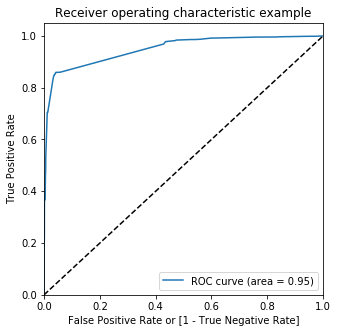

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


#### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0
4750,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0
7987,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1


#### Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.705873  0.981603  0.533163
0.2   0.2  0.910408  0.859771  0.942125
0.3   0.3  0.918910  0.859362  0.956210
0.4   0.4  0.920013  0.858136  0.958771
0.5   0.5  0.919383  0.851594  0.961844
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.919225  0.845053  0.965685
0.8   0.8  0.878287  0.705233  0.986684
0.9   0.9  0.813258  0.524530  0.994110


#### Let's plot accuracy sensitivity and specificity for various probabilities.


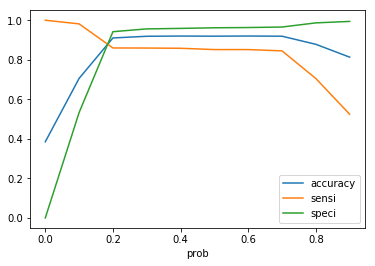

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Inference 
- From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

#### View the sample of predicted value after deciding on cutoff probability

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0,0
4750,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0,1
7987,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1,1


#### Assigning Lead Score


In [139]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
3009,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1012,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0,0,19
9226,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
4750,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0,1,78
7987,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


### Let's check the overall accuracy.

In [140]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Let's see the sensitivity of our logistic regression model


In [141]:
TP / float(TP+FN)

0.8597710547833197

#### Let us calculate specificity

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.9421254801536492

#### Calculate false postive rate - predicting churn when customer does not have churned

In [143]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05787451984635083


#### Positive predictive value 

In [144]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9029626449119794


#### Negative predictive value


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9147190452511188


#### Precision and Recall

Looking at the confusion matrix again

In [146]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3756,  149],
       [ 363, 2083]], dtype=int64)

##### Precision

In [147]:
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9332437275985663

##### Recall

In [148]:
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8515944399018807

##### Using sklearn utilities for the same



In [149]:
from sklearn.metrics import precision_score, recall_score


In [150]:
print('The Precision value is ',precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))


The Precision value is  0.9332437275985663


In [151]:
print('The Recall value is ',recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

The Recall value is  0.8515944399018807


##### Precision and recall tradeoff

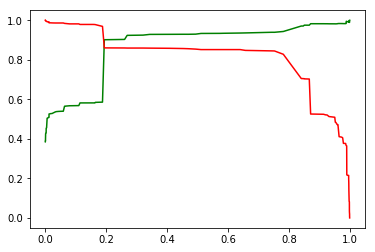

In [152]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Making predictions on the test set

In [153]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.428657,-0.157526,-0.148498,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.428657,-0.537185,-0.148498,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.147962,-0.885664,-1.265259,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.428657,1.645394,-0.148498,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.650299,2.019551,0.130693,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [154]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0


In [155]:
X_test_sm = sm.add_constant(X_test)


##### Making predictions on the test set



In [157]:
y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

#### Let's check the overall accuracy.

In [158]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.906720528828498

#### View the confusion matrix

In [159]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1635,   99],
       [ 155,  834]], dtype=int64)

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Let's see the sensitivity of our logistic regression model


In [161]:
TP / float(TP+FN)

0.8432760364004045

#### Let us calculate specificity

In [162]:
TN / float(TN+FP)

0.9429065743944637

##### Precision

In [163]:
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9332437275985663

#### Lets Look for entire data now and Check for the converison 

In [202]:
X = leads.drop(['Prospect ID','Converted'],axis=1)
X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X = sm.add_constant(X[col2])
X['Probability'] = res.predict(X)

X['lead_score'] = X['Probability']*100
X['lead_score'] = X['lead_score'].apply(lambda x:round(x,2))
X[['Prospect ID','Converted']] = leads[['Prospect ID','Converted']]

print('The sample after prediction on entire data')
X.sample(5)

The sample after prediction on entire data


,const,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent,Probability,lead_score,Prospect ID,Converted
3731,1.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0.996691,99.67,1d9b0d50-55a5-428c-b667-3e13c6f0d433,1
5792,1.0,0,1,0,1,0,0,0,0,1,0,0,0,1,0.999132,99.91,2b4028a4-f532-46c1-95f4-957ba14a69a0,1
5157,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.004367,0.44,db5a68e6-036b-4067-88d6-25bfd65b96c8,0
3971,1.0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.782077,78.21,bc3071c2-2fc2-4a8e-af97-cd0787656248,1
3931,1.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.188037,18.80,b1e0c22d-7d38-4c01-ae5d-92264e70bfb1,0


#####  Now we had already decided if people who comes under more than 0.2(20%) are the peoples whom we need to pay more heed too.
##### Below defines people whom we need to pay more heed too

In [200]:
Ppl_need_payheed = X.query('lead_score>20')
print('The shape of People which we need to pay heed to ',len(Ppl_need_payheed))
print('The sample data of People having high probability of conversion')
Ppl_need_payheed.sample(5)

The shape of People which we need to pay heed to  3262
The sample data of People having high probability of conversion


,const,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent,Probability,lead_score,Prospect ID,Converted
789,1.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.999260,99.93,120b8625-5b67-4ab7-8150-c26658211237,1
7564,1.0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.782077,78.21,cdf64ae4-d0b1-45af-a8be-4d35f845208a,0
3978,1.0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.782077,78.21,365a05ff-8b2e-4263-a76f-45132142b35c,1
7482,1.0,0,1,1,0,0,0,0,0,1,0,0,0,1,0.999891,99.99,55e4867b-7f32-4944-b7ef-4727e167b066,1
3455,1.0,0,1,1,0,0,0,0,0,1,0,1,0,1,0.996924,99.69,19991a9b-6339-43d1-8989-1dcd43d9890b,1


#### Inference -

- The prediction of the model, the senstivity and specificity came down to be 0.84 and 0.94, which seems like to have good model for the prediction on test data.
- We have to also check the conversion rate to be more tham 80%, from the above result, we can see that the converison rates are more than the specified 80%,which mean that total positive out of overall positives which is sensitivity. So the value of the above result is 84% which is more than 80% as defined in the problem.

In [164]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')